In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [4]:
file_path = "C:/Users/HP/OneDrive/Desktop/heart disease/heart.csv"
df = pd.read_csv(file_path)

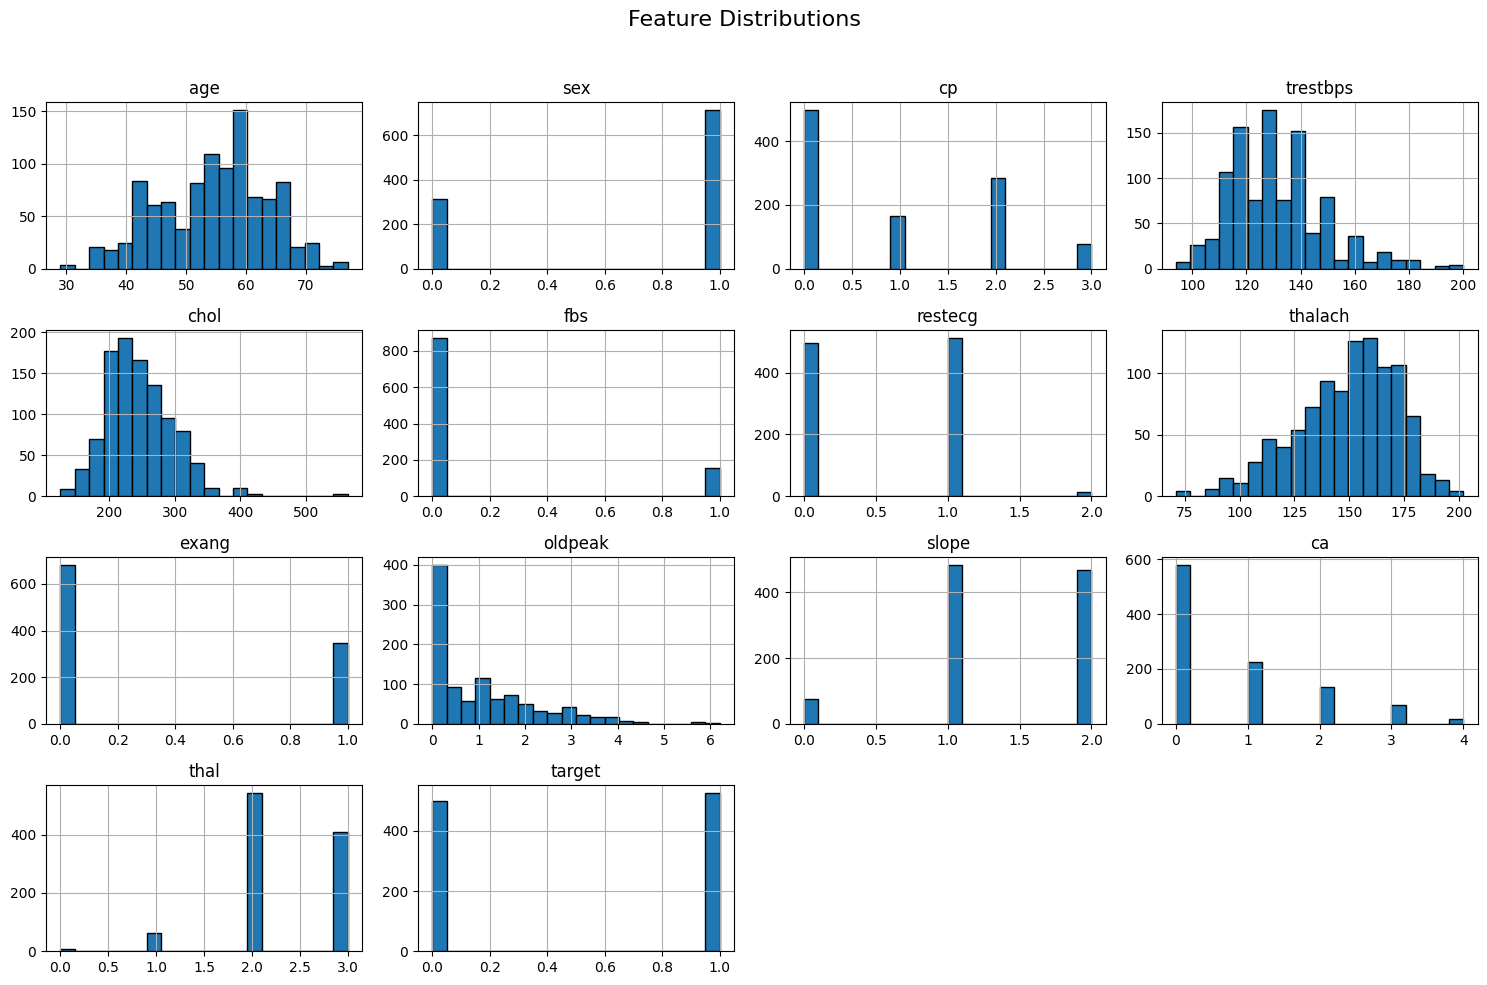

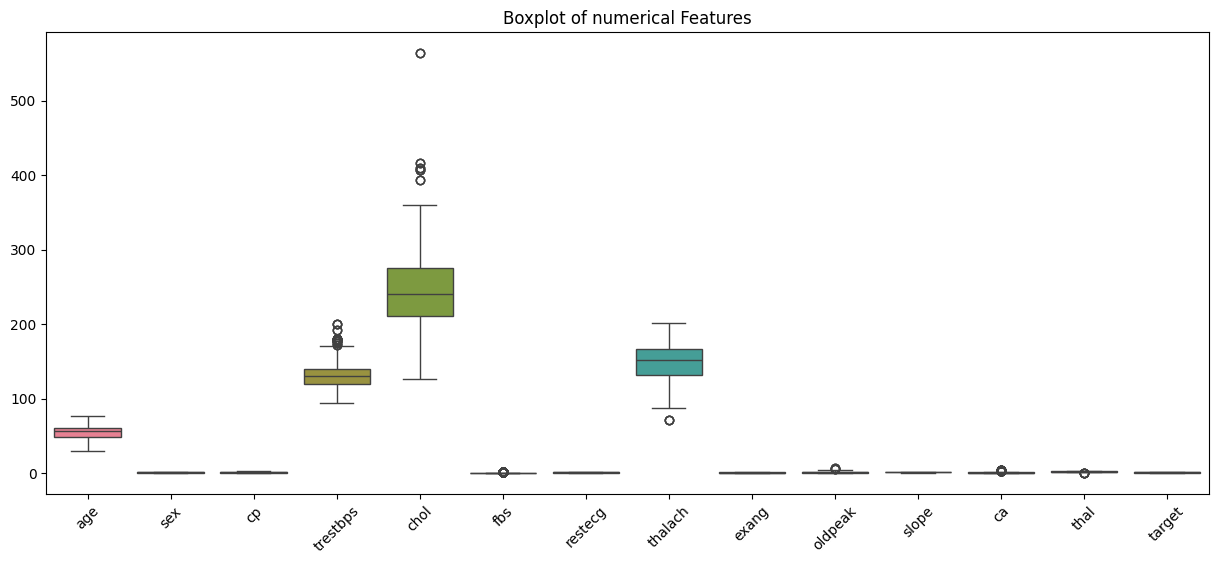

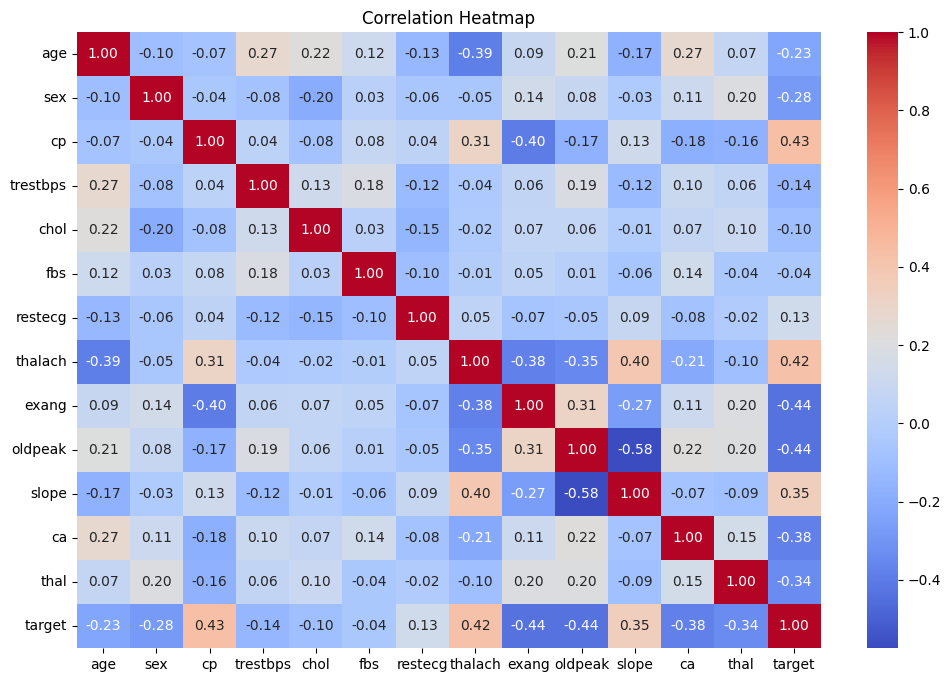

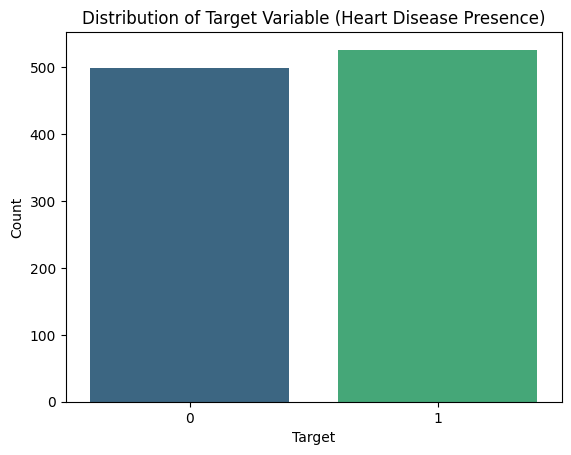

In [6]:
#Exploratory data analysis
#Feature distributions
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
#Box plot for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title("Boxplot of numerical Features")
plt.xticks(rotation=45)
plt.show()
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Countplot for Target Variable
sns.countplot(x='target', data=df, hue='target', palette='viridis', dodge=False, legend=False)
plt.title("Distribution of Target Variable (Heart Disease Presence)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

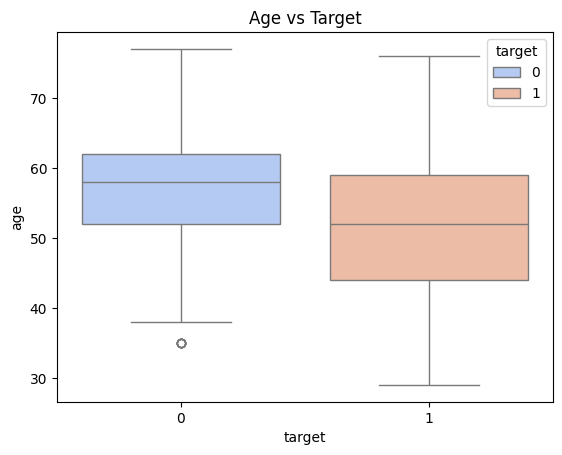

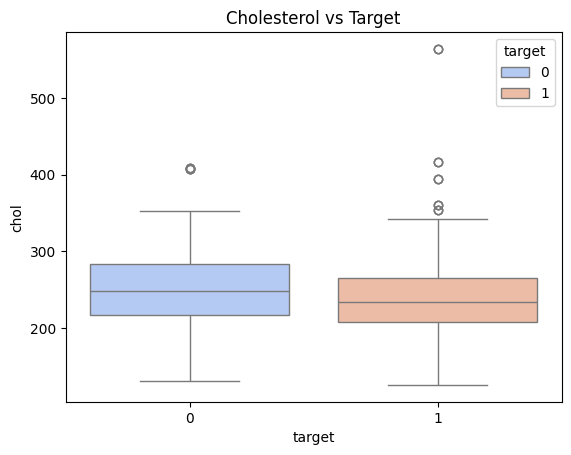

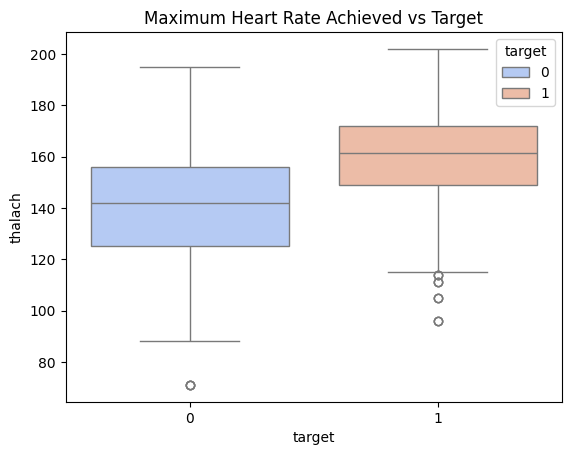

In [8]:
# Boxplot for Key Relationships
sns.boxplot(x='target', y='age', hue='target', data=df, palette='coolwarm', dodge=False)
plt.title("Age vs Target")
plt.show()

sns.boxplot(x='target', y='chol', hue='target', data=df, palette='coolwarm', dodge=False)
plt.title("Cholesterol vs Target")
plt.show()

sns.boxplot(x='target', y='thalach', hue='target', data=df, palette='coolwarm', dodge=False)
plt.title("Maximum Heart Rate Achieved vs Target")
plt.show()

In [9]:
#Preprocessing
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [11]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [12]:
# Step 5: Evaluation
# Logistic Regression Metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_pred))

# Random Forest Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, rf_pred))

Logistic Regression Accuracy: 0.7951219512195122

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Random Forest Accuracy: 0.9853658536585366

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



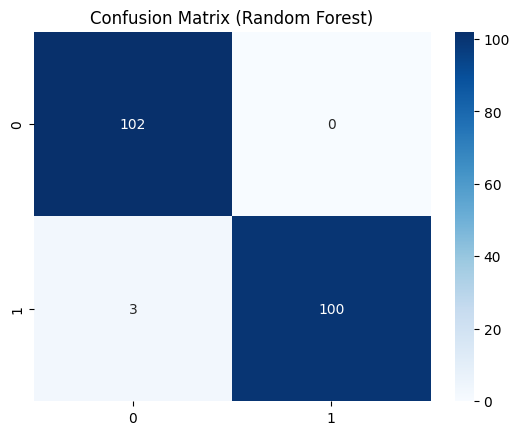

In [13]:
# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.show()

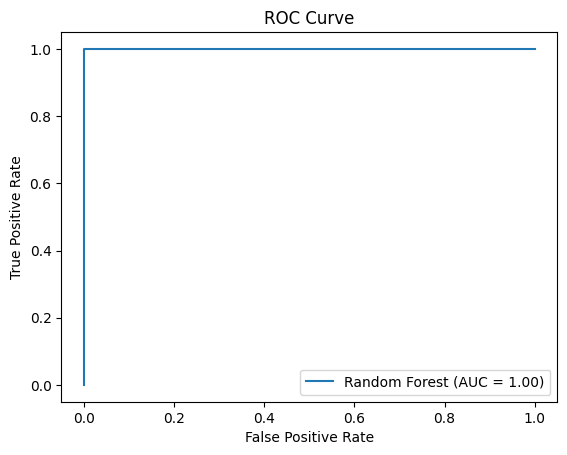

In [14]:
# ROC Curve for Random Forest
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_pred_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
joblib.dump(rf_model, 'heart_disease_rf_model.pkl')

# Load the model and test
loaded_model = joblib.load('heart_disease_rf_model.pkl')
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))

Loaded Model Accuracy: 0.9853658536585366


In [16]:
# Function to predict the probability of heart disease
def predict_heart_disease(input_data, model, scaler):
    # Convert user input to a DataFrame for prediction
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Scale the input data
    input_scaled = scaler.transform(input_df)
    
    # Predict probability
    prob = model.predict_proba(input_scaled)[0]
    prediction = model.predict(input_scaled)[0]
    
    return prediction, prob[1]  # prob[1] corresponds to the probability of heart disease

# Gather user input
print("\nEnter the following values to predict heart disease risk:")
user_input = {
    'age': int(input("Age: ")),
    'sex': int(input("Sex (1 = Male, 0 = Female): ")),
    'cp': int(input("Chest Pain Type (0, 1, 2, 3): ")),
    'trestbps': int(input("Resting Blood Pressure: ")),
    'chol': int(input("Cholesterol: ")),
    'fbs': int(input("Fasting Blood Sugar (> 120 mg/dl, 1 = True, 0 = False): ")),
    'restecg': int(input("Resting ECG Results (0, 1, 2): ")),
    'thalach': int(input("Maximum Heart Rate Achieved: ")),
    'exang': int(input("Exercise-Induced Angina (1 = Yes, 0 = No): ")),
    'oldpeak': float(input("ST Depression Induced by Exercise: ")),
    'slope': int(input("Slope of the Peak Exercise ST Segment (0, 1, 2): ")),
    'ca': int(input("Number of Major Vessels (0-3): ")),
    'thal': int(input("Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): "))
}

# Predict and display results
prediction, probability = predict_heart_disease(user_input, rf_model, scaler)

if prediction == 1:
    print(f"\nThe model predicts that the person has a high chance of heart disease.")
else:
    print(f"\nThe model predicts that the person has a low chance of heart disease.")
    
print(f"Probability of having heart disease: {probability * 100:.2f}%")



Enter the following values to predict heart disease risk:


Age:  20
Sex (1 = Male, 0 = Female):  0
Chest Pain Type (0, 1, 2, 3):  0
Resting Blood Pressure:  120
Cholesterol:  230
Fasting Blood Sugar (> 120 mg/dl, 1 = True, 0 = False):  0
Resting ECG Results (0, 1, 2):  1
Maximum Heart Rate Achieved:  150
Exercise-Induced Angina (1 = Yes, 0 = No):  0
ST Depression Induced by Exercise:  1.5
Slope of the Peak Exercise ST Segment (0, 1, 2):  1
Number of Major Vessels (0-3):  1
Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect):  1



The model predicts that the person has a high chance of heart disease.
Probability of having heart disease: 53.00%
